# Post-processing

This notebook demonstrates how to produce plots to represent the information extracted from the morphodynamics behavior. All plots are returned as Matplotlib figures that can be customized and exported easily.

In [11]:
#%load_ext autoreload
#%autoreload 2

import matplotlib
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipw
from IPython.display import display

import morphodynamics.plots
from morphodynamics.plots.ui_wimage import Wimage
from morphodynamics.plots import animate_plots, show_plots
from morphodynamics.utils import load_alldata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Define a path to a folder containin the Parameters, Results etc. and use the ```utils.load_alldata``` to import the data:

In [5]:
default_path = '../synthetic/data/Results_step/'
param, res, data = load_alldata(default_path, load_results=True)

## Display the windows

In [19]:
wimage = Wimage(param, data, res)
wimage.interface

## Curvature, length etc.

Create a plot containing geometrical properties of the contour over time:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
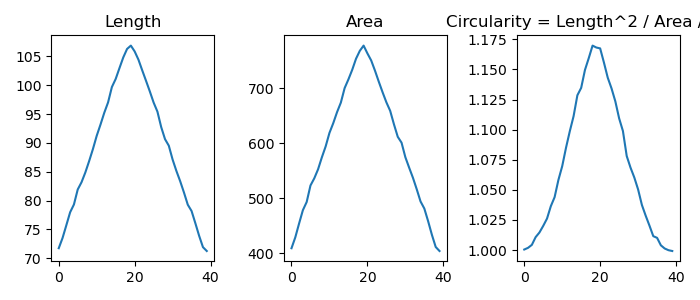

In [37]:
fig_curv, ax_curv = show_plots.show_circularity(data, res, size=(7,3))

As the previous function returned the corresponding figure and axis, we can adjust now our plt. For example we can override the title of the first figure:

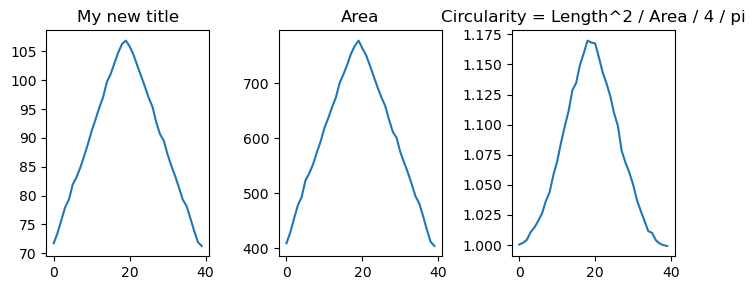

In [38]:
ax_curv[0].set_title('My new title')
fig_curv

## Edge overview

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
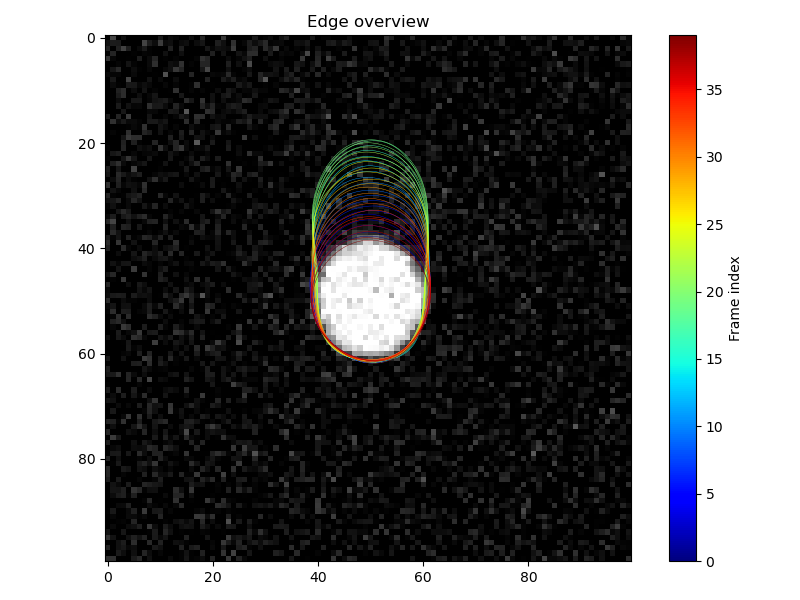

In [22]:
fig_edge_overview, ax_edge_overview = show_plots.show_edge_overview(
                param, data, res, lw=0.3, size=(8, 6)
            )

## Edge vectorial

For the edge plots, we can either create a static plot or an animation. To create the animation, we first create a figure and then re-use it. This means that any customization made on the static figure (as here the ```xlabel```) are conserved in the animation:

In [39]:
out = ipw.Output()
with plt.ioff():
    fig, ax = plt.subplots(figsize=(5,5))
    fig_edge_vect, ax_edge_vect = show_plots.show_edge_vectorial_aux(
        param, data, res, k=1, curvature=False, fig_ax=(fig, ax))
    ax.set_xlabel('my test');

int_box = animate_plots.interact_edge_vect(data, param, res, fig, ax)
ipw.VBox([fig.canvas, int_box])

## Edge rasterized

The same is true for the visualization of the rasteried contour plot:

In [40]:
from morphodynamics.splineutils import edge_colored_by_features                                            

In [41]:
with plt.ioff():
    fig, ax = show_plots.show_edge_raster_coloured_by_feature(
        data, res, 10, feature='curvature', N=None, width=3, normalize=True, cmap_name='jet')

t_slider = animate_plots.interact_edge_raster_coloured_by_feature(data, param, res, 100, feature='displacement_cumul',
                                                        fig=fig, ax=ax, width=3,normalize=True, cmap_name='jet', alpha=0.8)
ipw.VBox([fig.canvas, t_slider])

The colouring of the edge can represent several varaibles: displacement, cumulative displacement or curvature. These options can be set via the ```feature``` option:

In [42]:
im_disp,_ = edge_colored_by_features(data, res, t=0, feature='displacement', N=100)
im_disp_cumul,_ = edge_colored_by_features(data, res, t=0, feature='displacement_cumul', N=100)
im_curv,_ = edge_colored_by_features(data, res, t=20, feature='curvature', N=100)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
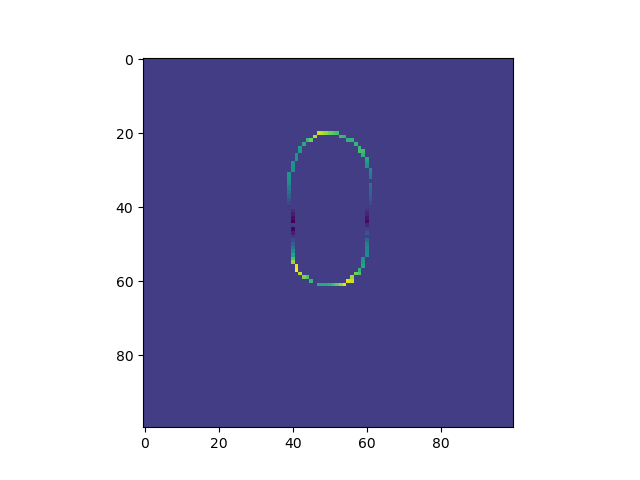

In [44]:
plt.figure()
plt.imshow(im_curv);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
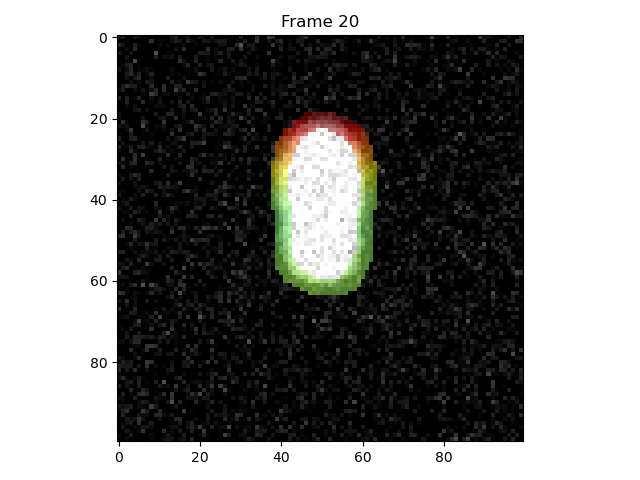

In [45]:
fig, ax = show_plots.show_edge_raster_coloured_by_feature(data, res,20, 'displacement_cumul', width=4, cmap_name='jet'
                                               )

## Curvature

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
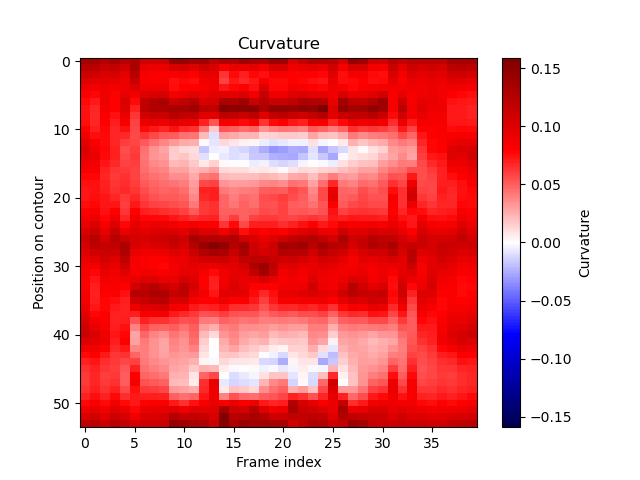

In [32]:
fig, ax = show_plots.show_curvature(data, res)

## Displacement

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
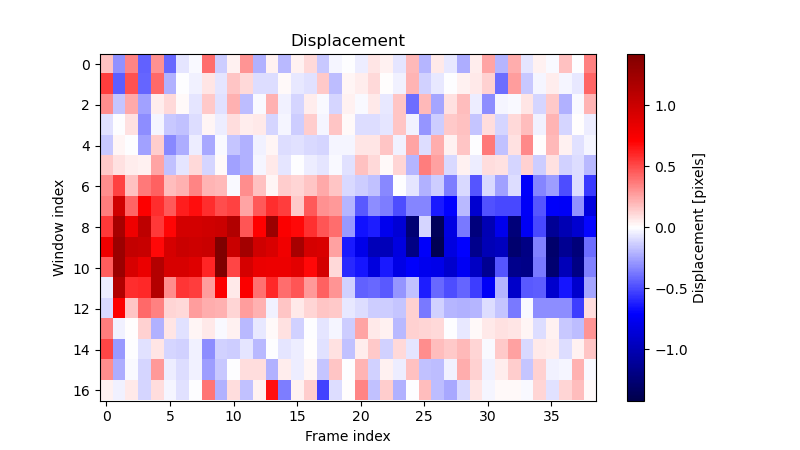

In [33]:
fig, ax = show_plots.show_displacement(param, res, size=(8, 4.5));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
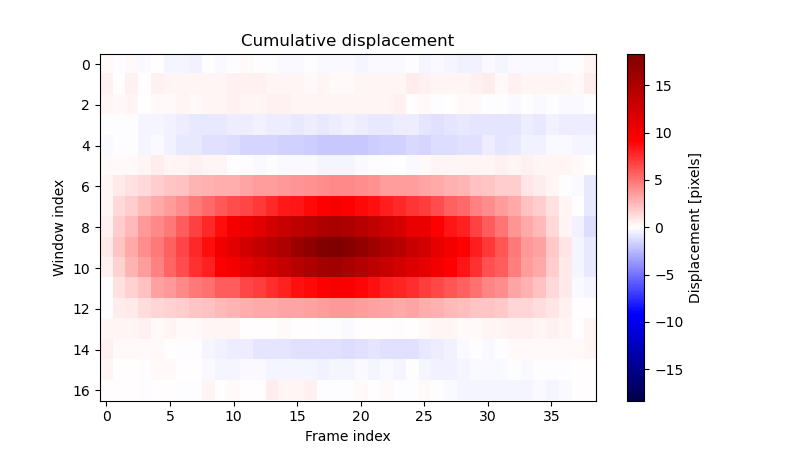

In [34]:
fig, ax = show_plots.show_cumdisplacement(res, size=(8, 4.5));

## Signals

Signal list:

In [46]:
for ind,s in enumerate(data.signal_name):
    print(f'index {ind}: {s}')

index 0: synth_ch2.h5
index 1: synth_ch3.h5


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
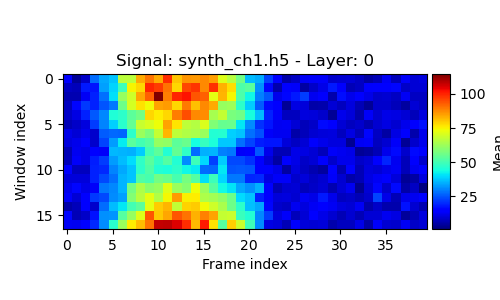

In [47]:
fig, ax = show_plots.show_signals_aux(
    data, res, signal_index=0, layer_index=0, mode='Mean', fig_ax=None, size=(5, 3), layer_title=False
)

Here again one can easily customize the plot.

In [48]:
ax.set_title("Signal: Channel 1")

Text(0.5, 1.0, 'Signal: Channel 1')